# **Procesamiento de archivos .EDI**
> *“Desde siempre he sospechado que todos nosotros
somos muchos, que hay identidades agazapadas en el fondo de la
conciencia, que damos rienda suelta a vidas paralelas, que mentimos con
mucha facilidad, que nos ocultamos, que somos otros. Estar seguro de que
los demás son impostores no parece una enfermedad, sino un exceso de
agudeza. Porque, ¿quién conoce a fondo a todos aquellos que lo
habitan?”* Tomado de: La locura de nuestro tiempo: ZOMBIS E IMPOSTORES

**Elaborador por:** \
Ivan Camilo Caballero Jaimes 2210625 \
Johan Enrique Páez Romero 2210631 \
Semillero de Investigación en Geofísica Aplicada y Computacional - **SIGAC**

# Librerías 

In [1]:
from pathlib import Path
from mtpy import MT, MTCollection
## mtpy 1.1.5
## mtpy-v2 2.0.7
import h5py
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Creación del archivo H5

### Definir la ruta

Se crea un archivo .h5 que contiene las funciones de transferencia de los sondeos MT extraídos del formato .EDI


In [2]:
# Ruta donde se encuentran los edis
edi_path = Path("../data/edis")
edi_path.exists() # verificar si la ruta existe 

True

Conocer cuales edis se encuentran en la ruta

In [3]:
# Archivos edi existentes en la ruta
print(", ".join([fn.name for fn in edi_path.glob("*.edi")]))

MC0001.edi, MC0002.edi, MC0006.edi, MC0007.edi, MC0008.edi, MC0009.edi, MC0010.edi, MC0011.edi, MC0012.edi, MC0013.edi, MC0014.edi, MC0015.edi, MC0016.edi, MC0018.edi, MC0019.edi, MC0020.edi, MC0021.edi, MC0022.edi, MC0024.edi, MC0025.edi, MC0027.edi, MC0028.edi, MC0029.edi, MC0030.edi, MC0031.edi, MC0032.edi, MC0033.edi, MC0034.edi, MC0035.edi, MC0036.edi, MC0037.edi, MC0038.edi, MC0039.edi, MC0040.edi, MC0041.edi, MC0042.edi, MC0043.edi, MC0044.edi, MC0045.edi, MC0046.edi, MC0047.edi, MC0048.edi, MC0049.edi, MC0050.edi, MC0051.edi, MC0052.edi, MC0055.edi, MC0056.edi, MC0057.edi, MC0060.edi, MC0064.edi, MC0065.edi, MC0066.edi, MC0068.edi


Definimos la ruta donde se va a guardar el archivo .h5


In [4]:
#Definimos una variable donde se encuentra la ruta del archivo .h5 creado anteriormente 
path_h5="../data/transfers_functions/level_0/"


### Creación de la colección

Se crea un "collection" y se crea el archivo .h5 en la ruta definida

In [ ]:
mc = MTCollection() #Crea un archivo H5 en la ruta actual
mc.open_collection(Path(path_h5+"cerromachin_collection5.h5")) #se crea en la subcarpeta de Data-->transfer_functions

24:12:07T07:34:47 | INFO | line:679 |mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file ..\data\transfers_functions\level_0\cerromachin_collection5.h5 in mode a


El archivo creado está vacío.

In [8]:
mc.master_dataframe.head() #Se imprime el contenido. No debe mostrarse nada ya que aun no se han cargado los datos al archivo .h5

,station,survey,latitude,longitude,elevation,tf_id,units,has_impedance,has_tipper,has_covariance,period_min,period_max,hdf5_reference,station_hdf5_reference
0,MC0001,MC,4.453861,-75.337556,2091.0,MC0001,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
1,MC0002,MC,4.469861,-75.389528,2125.0,MC0002,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
2,MC0006,MC,4.444083,-75.357556,1820.0,MC0006,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
3,MC0007,MC,4.459944,-75.348806,2070.0,MC0007,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
4,MC0008,MC,4.449639,-75.347694,1787.0,MC0008,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>


El siguiente código carga los edis que se encuentran en la ruta anteriormente definida. \
Realiza un bucle en la ruta, iterando sobre cada edi para luego guardarlo en la colección.\
El archivo ahora tendrá las funciones de transferencia de cada archivo .edi.

In [7]:
%%time
# Cargar los edis al MTColecction
for edi_filename in mc.make_file_list(edi_path, file_types=["edi"]):
    mt_object = MT(edi_filename) # Crea un objeto del .edi
    mt_object.read() # Lee el objeto

    # Actualizar el id del survey
    mt_object.survey_metadata.id = "MC" # Se le agrega un survey al edi
    mc.add_tf(mt_object) # Agrega el edi a la colección

24:12:07T07:34:51 | WARNING | line:1058 |mth5.mth5 | get_survey | /Experiment/Surveys/MC does not exist, check survey_list for existing names.
CPU times: total: 58.5 s
Wall time: 4min 32s


In [10]:
mc.close_collection()

24:12:07T07:44:33 | INFO | line:761 |mth5.mth5 | close_mth5 | Flushing and closing ..\data\transfers_functions\level_0\cerromachin_collection5.h5


In [14]:
import h5py
import mtpy

# Leer datos del archivo .h5
h5_file = "cerromachin_collection5.h5"
edi_file = "output1.edi"

with h5py.File(path_h5+"cerromachin_collection5.h5", 'r') as f:
    # Explorar la estructura del archivo
    print(f.keys())
    # Aquí extraes las impedancias, frecuencias, etc.
"""
# Crear un objeto EDI en mtpy
edi = mtpy.modeling.edi.EDI()

# Configurar los datos para el archivo .edi
edi.z = ...  # Impedancia extraída del archivo .h5
edi.freq = ...  # Frecuencias extraídas
edi.station = "MC0001"
edi.lon = ...  # Longitud
edi.lat = ...  # Latitud
edi.save(fn_edi=edi_file)

print(f"Archivo .edi guardado en {edi_file}")

"""

<KeysViewHDF5 ['Experiment']>


'\n# Crear un objeto EDI en mtpy\nedi = mtpy.modeling.edi.EDI()\n\n# Configurar los datos para el archivo .edi\nedi.z = ...  # Impedancia extraída del archivo .h5\nedi.freq = ...  # Frecuencias extraídas\nedi.station = "MC0001"\nedi.lon = ...  # Longitud\nedi.lat = ...  # Latitud\nedi.save(fn_edi=edi_file)\n\nprint(f"Archivo .edi guardado en {edi_file}")\n\n'

In [ ]:
import h5py
import mtpy.modeling.edi as mtedi
# Nombres de los archivos
input_h5 = "datos_mt.h5"  # Nombre del archivo de entrada .h5
output_edi = "salida_mt.edi"  # Nombre del archivo de salida .edi

# Leer el archivo .h5
with h5py.File(input_h5, 'r') as h5f:
    # Explorar el contenido para entender su estructura
    print("Grupos disponibles en el archivo:")
    print(h5f.keys())
    
    # Extraer datos relevantes
    # Aquí ajusta los nombres de las claves según la estructura de tu archivo
    frecuencia = h5f['frequency'][:]  # Frecuencias
    impedancias = h5f['impedance'][:]  # Matriz de impedancias (Zxx, Zxy, Zyx, Zyy)
    errores = h5f['errors'][:]  # Errores asociados
    latitud = h5f.attrs['latitude']  # Latitud (atributo global)
    longitud = h5f.attrs['longitude']  # Longitud (atributo global)
    estacion = h5f.attrs['station_name']  # Nombre de la estación

# Crear el objeto EDI
edi = mtedi.EDI()

# Configurar el objeto EDI con los datos
edi.station = estacion
edi.lat = latitud
edi.lon = longitud
edi.freq = frecuencia
edi.z = impedancias  # Impedancia (debe estar en formato Nx4 para Zxx, Zxy, Zyx, Zyy)
edi.z_err = errores  # Errores de impedancia

# Guardar el archivo .edi
edi.save(fn_edi=output_edi)
print(f"Archivo .edi creado: {output_edi}")


In [15]:
import mtpy.core.edi_collection

ImportError: cannot import name 'get_epsg' from 'mtpy.utils.gis_tools' (c:\Programas\anaconda3\envs\simpeg0170\Lib\site-packages\mtpy\utils\gis_tools.py)

In [16]:
mc.open_collection(path_h5+"cerromachin_collection5.h5")

In [18]:
mc.close_collection()

24:12:07T07:53:32 | INFO | line:761 |mth5.mth5 | close_mth5 | Flushing and closing ..\data\transfers_functions\level_0\cerromachin_collection5.h5


In [2]:
from mtpy.core.edi_collection import EdiCollection

In [4]:
path_h5="../data/transfers_functions/level_0/"
h5_file = path_h5+"cerromachin_collection5.h5"
output_directory = "/edi"

In [20]:
edi_collection = EdiCollection(h5_file)

number of stations/edifiles = 62


AttributeError: 'Z' object has no attribute 'freq'

In [16]:
dir(EdiCollection)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_all_periods',
 'calculate_aver_impedance',
 'create_measurement_csv',
 'create_mt_station_gdf',
 'create_penetration_depth_csv',
 'create_phase_tensor_csv',
 'create_phase_tensor_csv_with_image',
 'display_on_basemap',
 'display_on_image',
 'export_edi_files',
 'get_bounding_box',
 'get_min_max_distance',
 'get_period_occurance',
 'get_periods_by_stats',
 'get_phase_tensor_tippers',
 'get_station_utmzones_stats',
 'get_stations_distances_stats',
 'plot_stations',
 'select_periods',
 'show_obj']

In [10]:
EdiCollection.export_edi_files(
    dest_dir=output_directory,  # Directorio de salida
    period_list=None,  # Exporta para todas las frecuencias disponibles
    interpolate=True,  # Activa interpolación
    period_buffer=None,  # Sin ajustes adicionales
    longitude_format='LON'  # Usa el formato de longitud estándar
)

TypeError: EdiCollection.export_edi_files() missing 1 required positional argument: 'self'

# Observación de los datos 
Una vez creado el archivo .h5 que contiene las funciones de transferencia de los archivos .edi se muestra como un dataframe para verificar que contiene todos los sondeos. 

In [15]:
mc.master_dataframe

,station,survey,latitude,longitude,elevation,tf_id,units,has_impedance,has_tipper,has_covariance,period_min,period_max,hdf5_reference,station_hdf5_reference
0,MC0001,MC,4.453861,-75.337556,2091.0,MC0001,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
1,MC0002,MC,4.469861,-75.389528,2125.0,MC0002,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
2,MC0006,MC,4.444083,-75.357556,1820.0,MC0006,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
3,MC0007,MC,4.459944,-75.348806,2070.0,MC0007,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
4,MC0008,MC,4.449639,-75.347694,1787.0,MC0008,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
5,MC0009,MC,4.451389,-75.329444,2381.0,MC0009,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
6,MC0010,MC,4.469139,-75.350861,2098.0,MC0010,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
7,MC0011,MC,4.454306,-75.377139,1812.0,MC0011,none,True,True,False,0.003125,2941.176471,<HDF5 object reference>,<HDF5 object reference>
8,MC0012,MC,4.459917,-75.329222,2223.0,MC0012,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
9,MC0013,MC,4.459583,-75.359889,2185.0,MC0013,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>


In [ ]:
mc.close_collection() #El archivo queda abierto. Se recomienda cerrar al dejar de trabajar el código

### Verificación de resistividad aparente y fase (pre-filtrado)
Se observa que en efecto los datos tienen ruido para periodos >10S (ej. MC0041) y algunos todos sus datos son ruidosos (ej. MC0033)

24:11:29T10:46:00 | WARNING | line:300 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID MC0002. Suggest setting survey, otherwise returning the TF from survey MC.


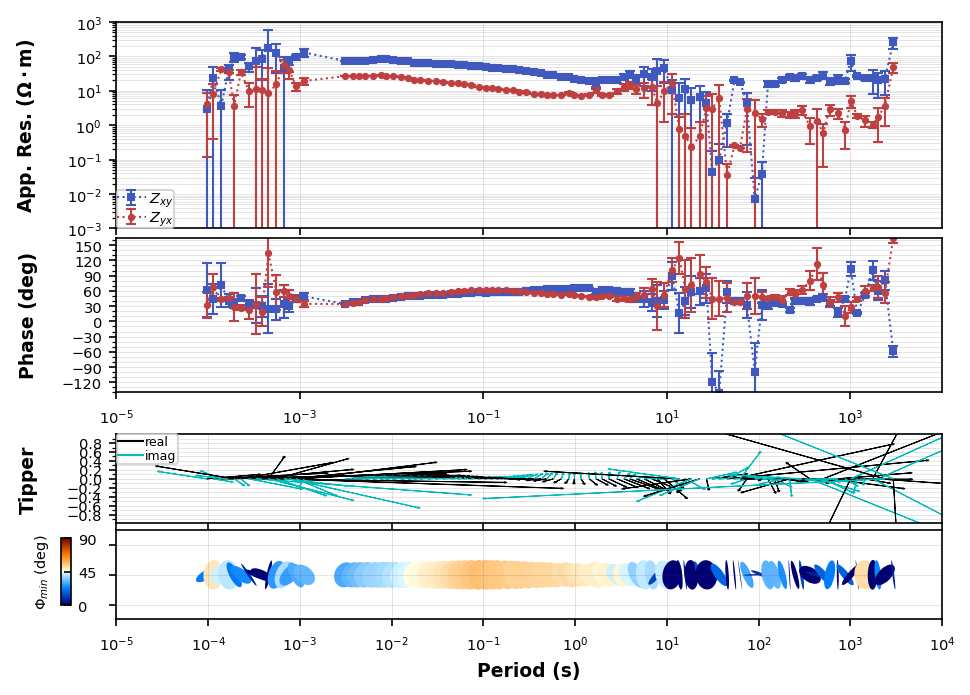

In [7]:
# Observamos las funciones de transferencia de un estación
try:
    mc.plot_mt_response("MC0002")
except:
    pass
    #plt.savefig('S02_mtresponse_raw.png', dpi=300)


In [10]:
mc.close_collection()

24:11:22T17:24:42 | INFO | line:761 |mth5.mth5 | close_mth5 | Flushing and closing ..\data\transfers_functions\level_0\cerromachin_collection.h5


24:11:28T22:19:38 | WARNING | line:300 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID MC0052. Suggest setting survey, otherwise returning the TF from survey MC.


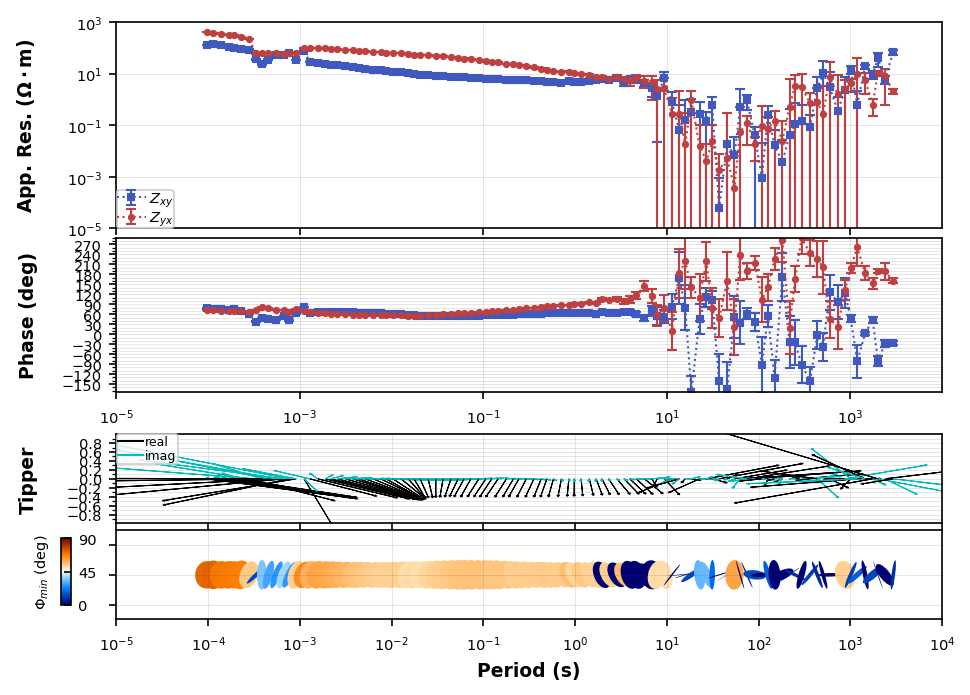

In [11]:
try:
    mc.plot_mt_response("MC0052")
except:
    pass

In [9]:
mc.get_tf('MC0032').Z.period

24:10:11T20:28:40 | WARNING | line:300 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID MC0032. Suggest setting survey, otherwise returning the TF from survey MC.


array([3.12499902e-03, 3.77358491e-03, 4.36681223e-03, 5.15463918e-03,
       6.28930818e-03, 7.57575758e-03, 8.69565217e-03, 1.03092794e-02,
       1.26582262e-02, 1.51515152e-02, 1.75438596e-02, 2.04081633e-02,
       2.50000000e-02, 3.03030303e-02, 3.63636364e-02, 4.44444444e-02,
       5.31914894e-02, 6.17283951e-02, 7.29927007e-02, 8.92857143e-02,
       1.06382979e-01, 1.23456790e-01, 1.44927536e-01, 1.78571429e-01,
       2.12765957e-01, 2.43902439e-01, 2.94117647e-01, 3.55871886e-01,
       4.27350427e-01, 4.92610837e-01, 5.81395349e-01, 7.09219858e-01,
       8.54700855e-01, 9.80392157e-01, 1.16279070e+00, 1.42857143e+00,
       1.69491525e+00, 1.96078431e+00, 2.32558140e+00, 2.85714286e+00,
       3.41296928e+00, 3.93700787e+00, 4.65116279e+00, 5.68181818e+00,
       6.84931507e+00, 7.87401575e+00, 9.34579439e+00, 1.13636364e+01,
       1.36986301e+01, 1.58730134e+01, 1.85185185e+01, 2.27272727e+01,
       2.70270270e+01, 3.12500000e+01, 3.71747212e+01, 4.54545455e+01,
      

# Procesamiento General

Este procesamiento realiza sobre los datos crudos un recorte en un rango de periodos, para luego ser utilizado para acondicionamientos de 1D y 2D.

A continuación, verificamos la estructura del archivo para definir la función que corta los datos al rango de frecuencias o periodos deseado. 


In [6]:
# Estructura del H5
with h5py.File(path_h5+"cerromachin_collection.h5", "r") as h5file:
    # Función para imprimir la estructura
    def print_structure(name, obj):
        sys.stdout.write(name + '\n')

    # Imprimir la estructura sin truncado
    h5file.visititems(print_structure)

Experiment
Experiment/Reports
Experiment/Standards
Experiment/Standards/summary
Experiment/Surveys
Experiment/Surveys/MC
Experiment/Surveys/MC/Filters
Experiment/Surveys/MC/Filters/coefficient
Experiment/Surveys/MC/Filters/fap
Experiment/Surveys/MC/Filters/fir
Experiment/Surveys/MC/Filters/time_delay
Experiment/Surveys/MC/Filters/zpk
Experiment/Surveys/MC/Reports
Experiment/Surveys/MC/Standards
Experiment/Surveys/MC/Standards/summary
Experiment/Surveys/MC/Stations
Experiment/Surveys/MC/Stations/MC0001
Experiment/Surveys/MC/Stations/MC0001/Fourier_Coefficients
Experiment/Surveys/MC/Stations/MC0001/MC0001a
Experiment/Surveys/MC/Stations/MC0001/MC0001a/ex
Experiment/Surveys/MC/Stations/MC0001/MC0001a/ey
Experiment/Surveys/MC/Stations/MC0001/MC0001a/hx
Experiment/Surveys/MC/Stations/MC0001/MC0001a/hy
Experiment/Surveys/MC/Stations/MC0001/MC0001a/hz
Experiment/Surveys/MC/Stations/MC0001/MC0001a/rrhx
Experiment/Surveys/MC/Stations/MC0001/MC0001a/rrhy
Experiment/Surveys/MC/Stations/MC0001/Tra

Se identifica la ruta con la que se construye la función para seleccionar por estaciones: 'Experiment/Surveys/MC/Stations'

### Filtrado general

In [57]:
estaciones = ["36","55","56","57","20","47","13","08"]
min_period = []
max_period = []
for i in estaciones:
    min_period.append(mc.get_tf("MC00"+i).Z.period.min())
    max_period.append(mc.get_tf("MC00"+i).Z.period.max())

24:10:01T16:32:28 | WARNING | line:300 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID MC0036. Suggest setting survey, otherwise returning the TF from survey MC.


24:10:01T16:32:28 | WARNING | line:300 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID MC0036. Suggest setting survey, otherwise returning the TF from survey MC.
24:10:01T16:32:29 | WARNING | line:300 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID MC0055. Suggest setting survey, otherwise returning the TF from survey MC.
24:10:01T16:32:29 | WARNING | line:300 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID MC0055. Suggest setting survey, otherwise returning the TF from survey MC.
24:10:01T16:32:29 | WARNING | line:300 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID MC0056. Suggest setting survey, otherwise returning the TF from survey MC.
24:10:01T16:32:29 | WARNING | line:300 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID MC0056. Suggest setting survey, otherwise returning the TF from survey MC.
24:10:01T16:32:29 | WARNING | line:300 |

In [59]:
print(f"Los valores para los periodos bajos son: {np.unique(min_period)}")
print(f"Los valores para los periodos alto son: {np.unique(max_period)}")

print(f"El rango de periodo para la inversión es de: {max(min_period)} a {min(max_period)} [s]")
# Redondear para poder agarrar esos datos
# Tal como 0.0031249990234378053 a 9.345794392523365 [s] -> 0.003 a 10 [s]

Los valores para los periodos bajos son: [0.00111111 0.003125  ]
Los valores para los periodos alto son: [9.34579439]
El rango de periodo para la inversión es de: 0.0031249990234378053 a 9.345794392523365 [s]


In [ ]:
low_period = 0.001  # Periodo máximo deseado (en segundos)
high_period = 10.0  # Periodo mínimo deseado (en segundos)

with h5py.File(path_h5+"cerromachin_collection.h5", "r+") as h5file:
    stations_group = h5file['Experiment/Surveys/MC/Stations'] #'Experiment/Surveys/"Survey_ID"/Stations'
    
    # Iterar sobre todas las estaciones en el archivo H5
    for station in stations_group:
        tf_group = stations_group[f'{station}/Transfer_Functions/{station}']
        
        # Acceder a los periodos
        periods = tf_group['period'][:]
        
        # Filtrar los periodos dentro del rango deseado
        period_mask = (periods >= low_period) & (periods <= high_period)
        filtered_periods = periods[period_mask]
        
        # Obtener la transferencia original y el error
        transfer_function = tf_group['transfer_function'][:]
        transfer_function_error = tf_group['transfer_function_error'][:]
        
        # Filtrar la transferencia y el error según el periodo
        filtered_transfer_function = transfer_function[period_mask, :, :]
        filtered_transfer_function_error = transfer_function_error[period_mask, :, :]
        
        # Eliminar los datasets antiguos
        del tf_group['period']
        del tf_group['transfer_function']
        del tf_group['transfer_function_error']
        
        # Crear nuevos datasets con los datos filtrados
        tf_group.create_dataset('period', data=filtered_periods)
        tf_group.create_dataset('transfer_function', data=filtered_transfer_function)
        tf_group.create_dataset('transfer_function_error', data=filtered_transfer_function_error)

        print(f'Estación procesada: {station}')

#### Filtrado por estación

Podemos ir filtrando las estaciones una por una en caso de que se requieran diferentes rangos de frecuencias para cada estación.

In [ ]:
import h5py

# Define el rango de periodos
low_period = 0.001  # Periodo mínimo deseado (en segundos)
high_period = 2.0  # Periodo máximo deseado (en segundos)

# Abre el archivo HDF5
with h5py.File(path_h5, "r+") as h5file:
    stations_group = h5file['Experiment/Surveys/MC/Stations']

    # Muestra todas las estaciones disponibles
    available_stations = list(stations_group.keys())
    print("Estaciones disponibles:", available_stations)

    # Solicita al usuario que seleccione una estación
    selected_station = input("Introduce el nombre de la estación que deseas procesar: ")

    # Verifica si la estación seleccionada está en la lista de estaciones disponibles
    if selected_station in available_stations:
        # Accede a la estación seleccionada
        tf_group = stations_group[f'{selected_station}/Transfer_Functions/{selected_station}']
        
        # Acceder a los periodos
        periods = tf_group['period'][:]
        
        # Filtrar los periodos dentro del rango deseado
        period_mask = (periods >= low_period) & (periods <= high_period)
        filtered_periods = periods[period_mask]
        
        # Obtener la transferencia original y el error
        transfer_function = tf_group['transfer_function'][:]
        transfer_function_error = tf_group['transfer_function_error'][:]
        
        # Filtrar la transferencia y el error según el periodo
        filtered_transfer_function = transfer_function[period_mask, :, :]
        filtered_transfer_function_error = transfer_function_error[period_mask, :, :]
        
        # Eliminar los datasets antiguos
        del tf_group['period']
        del tf_group['transfer_function']
        del tf_group['transfer_function_error']
        
        # Crear nuevos datasets con los datos filtrados
        tf_group.create_dataset('period', data=filtered_periods)
        tf_group.create_dataset('transfer_function', data=filtered_transfer_function)
        tf_group.create_dataset('transfer_function_error', data=filtered_transfer_function_error)

        print(f'Estación procesada: {selected_station}')
    else:
        print(f"La estación '{selected_station}' no se encuentra en la lista de estaciones disponibles.")

### Verificación resisitividad aparente y fase (post-filtrado)

In [ ]:
# Observamos las funciones de transferencia de un estación
try:
    mc.plot_mt_response("MC0032")
except:
    pass
#24, 60, 21, 41, 40, 02, 14, 32

In [ ]:
# Observamos las funciones de transferencia de un estación
try:
    mc.plot_mt_response("MC0033")
except:
    pass

### Eliminar estaciones
Como se observó anteriormente algunas estaciones presentan ruido en todo su registro de datos, por que que es necesario eliminarlas. Según el documento del SGC se identifican 4 estaciones cuyos datos no serán utiles ["MC0027", "MC0033", "MC0046", "MC0051"].

len(mc.ma)

In [ ]:
len(mc.master_dataframe)

In [ ]:
# 

In [16]:
# Lista de estaciones que deseas eliminar
estaciones_a_eliminar = ["MC0009","MC0015","MC0027", "MC0033", "MC0046","MC0048","MC0050", "MC0051"]  #Cambia los nombres de las estaciones según sea necesario

# Abrir el archivo HDF5 en modo de lectura/escritura
with h5py.File(path_h5+"cerromachin_collection.h5", "r+") as h5file:
    stations_group = h5file['Experiment/Surveys/MC/Stations']
    
    # Iterar sobre las estaciones y eliminar las especificadas
    for estacion in estaciones_a_eliminar:
        if estacion in stations_group:
            del stations_group[estacion]
            print(f'Estación {estacion} eliminada.')
        else:
            print(f'Estación {estacion} no encontrada en el archivo.')

    # Guardar y cerrar el archivo


Estación MC0009 eliminada.
Estación MC0015 eliminada.
Estación MC0027 eliminada.
Estación MC0033 eliminada.
Estación MC0046 eliminada.
Estación MC0048 eliminada.
Estación MC0050 eliminada.
Estación MC0051 eliminada.


In [19]:
#verificación del archivo .h5 final
len(mc.master_dataframe)

46

# Procesamiento 2D

## Perfiles
Se cargará el archivo .h5 donde están los edis crudos, y se observará la gráfica de las estaciones con el fin de realizar un perfil que pase por gran parte de estaciones alineadas

### Abrir h5

In [2]:
#Ruta donde está el .h5
path_h5="../data/transfers_functions/"
# Se abre el collection
mc = MTCollection()
mc.open_collection(Path(path_h5+"level_0/cerromachin_collection.h5"))
# El Path(), es el directorio de trabajo en el que está el actual notebook.

In [8]:
# Se observa los edis en una tabla
mc.master_dataframe.head(25)

,station,survey,latitude,longitude,elevation,tf_id,units,has_impedance,has_tipper,has_covariance,period_min,period_max,hdf5_reference,station_hdf5_reference
0,MC0001,MC,4.453861,-75.337556,2091.0,MC0001,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
1,MC0002,MC,4.469861,-75.389528,2125.0,MC0002,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
2,MC0006,MC,4.444083,-75.357556,1820.0,MC0006,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
3,MC0007,MC,4.459944,-75.348806,2070.0,MC0007,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
4,MC0008,MC,4.449639,-75.347694,1787.0,MC0008,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
5,MC0010,MC,4.469139,-75.350861,2098.0,MC0010,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
6,MC0011,MC,4.454306,-75.377139,1812.0,MC0011,none,True,True,False,0.003125,2941.176471,<HDF5 object reference>,<HDF5 object reference>
7,MC0012,MC,4.459917,-75.329222,2223.0,MC0012,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
8,MC0013,MC,4.459583,-75.359889,2185.0,MC0013,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
9,MC0014,MC,4.462944,-75.387222,1994.0,MC0014,none,True,True,False,0.003125,2941.176471,<HDF5 object reference>,<HDF5 object reference>


### Graficar perfil

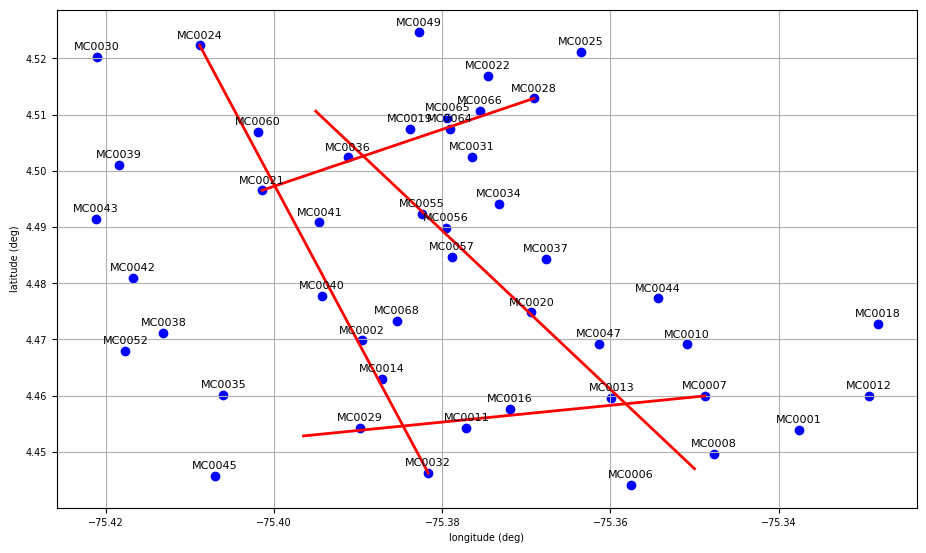

In [11]:
# Suponiendo que mc es tu MTCollection y generar el gráfico
# Se grafica la línea objetivo en el plot
data_plot = [np.array(mc.dataframe["station"]), np.array(mc.dataframe["latitude"]), np.array(mc.dataframe["longitude"])]

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data_plot[2], data_plot[1], color="b")

# ---> GENERAR EL PERFIL SOBRE EL GRÁFICO DE ESTACIONES <---

ax.plot([-75.408861, -75.381667], [4.522333, 4.446222], color='red', linestyle='-', linewidth=2)
ax.plot([-75.395056, -75.35], [4.510611, 4.447], color='red', linestyle='-', linewidth=2)
ax.plot([-75.401444, -75.369111], [4.496528, 4.512889], color='red', linestyle='-', linewidth=2)
ax.plot([-75.3965, -75.348806], [4.452833, 4.459944], color='red', linestyle='-', linewidth=2)

# ---> GRAFICAR <---
ax.set_xlabel('longitude (deg)')
ax.set_ylabel('latitude (deg)')

for i, name in enumerate(data_plot[0]):
    ax.annotate(name, (data_plot[2][i], data_plot[1][i]), 
                textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='black')

plt.grid(True) 
plt.show()

24:11:26T22:57:57 | WARNING | line:300 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID MC0040. Suggest setting survey, otherwise returning the TF from survey MC.


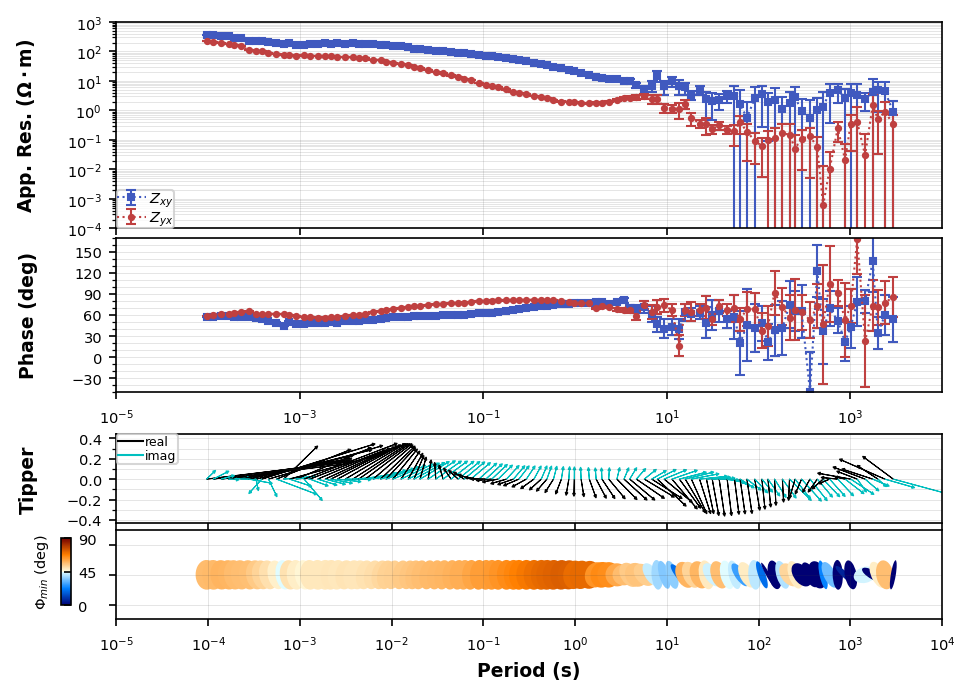

In [12]:
# OBSERVAR MT RESPONSE DE UNA ESTACIÓN EN ESPECIFICO
try:
    mc.get_tf("MC0040").plot_mt_response()
except:
    pass

In [10]:
len(mc.get_tf("MC0032").Z.frequency)

24:10:03T21:44:27 | WARNING | line:300 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID MC0032. Suggest setting survey, otherwise returning the TF from survey MC.


80

In [13]:
# Los datos abiertos son llevados a tipo MTData
interp_periods = np.logspace(np.log10(0.0032), np.log10(9.2), 50)

In [22]:
interpolated = mc.interpolate(interp_periods, inplace=False)

AttributeError: 'MTCollection' object has no attribute 'interpolate'

In [9]:
# CERRAR EL H5 (Con el fin de no generar problemas)
mc.close_collection()

24:10:01T16:18:41 | INFO | line:761 |mth5.mth5 | close_mth5 | Flushing and closing ..\data\transfers_functions\cerromachin_collection.h5


## Acondicionamiento de datos
Se cargarán el archivo crudo h5, y se generará una interpolación con el rango de frecuencias objetivo. Luego, se generará un perfil donde tomará las estaciones anteriormente vistas para posteriormente guardar en un .h5 (archivo listo para la inversión 2D)

### Cargar datos desde MTH5

In [2]:
path_h5= "../data/transfers_functions/level_0/"
mc = MTCollection() # Crea una instancia de la clase MTCollection()
mc.open_collection(Path(path_h5+"cerromachin_collection.h5"))

In [3]:
mc.master_dataframe.head()

,station,survey,latitude,longitude,elevation,tf_id,units,has_impedance,has_tipper,has_covariance,period_min,period_max,hdf5_reference,station_hdf5_reference
0,MC0001,MC,4.453861,-75.337556,2091.0,MC0001,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
1,MC0002,MC,4.469861,-75.389528,2125.0,MC0002,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
2,MC0006,MC,4.444083,-75.357556,1820.0,MC0006,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
3,MC0007,MC,4.459944,-75.348806,2070.0,MC0007,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
4,MC0008,MC,4.449639,-75.347694,1787.0,MC0008,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>


24:10:11T21:00:46 | WARNING | line:300 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID MC0052. Suggest setting survey, otherwise returning the TF from survey MC.


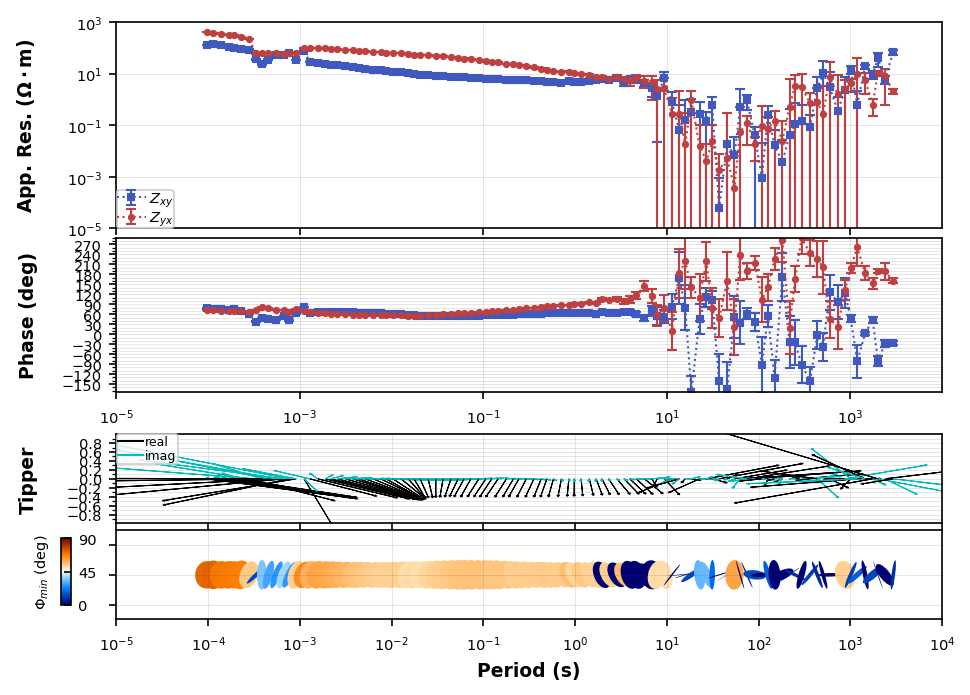

In [16]:
try:
    mc.plot_mt_response("MC0052")
except:
    pass

In [13]:
mt_data = mc.to_mt_data()

In [14]:
mt_data

MTData([('MC.MC0001',
         TF( survey='MC', station='MC0001', latitude=4.45, longitude=-75.34, elevation=2091.00 )),
        ('MC.MC0002',
         TF( survey='MC', station='MC0002', latitude=4.47, longitude=-75.39, elevation=2125.00 )),
        ('MC.MC0006',
         TF( survey='MC', station='MC0006', latitude=4.44, longitude=-75.36, elevation=1820.00 )),
        ('MC.MC0007',
         TF( survey='MC', station='MC0007', latitude=4.46, longitude=-75.35, elevation=2070.00 )),
        ('MC.MC0008',
         TF( survey='MC', station='MC0008', latitude=4.45, longitude=-75.35, elevation=1787.00 )),
        ('MC.MC0010',
         TF( survey='MC', station='MC0010', latitude=4.47, longitude=-75.35, elevation=2098.00 )),
        ('MC.MC0011',
         TF( survey='MC', station='MC0011', latitude=4.45, longitude=-75.38, elevation=1812.00 )),
        ('MC.MC0012',
         TF( survey='MC', station='MC0012', latitude=4.46, longitude=-75.33, elevation=2223.00 )),
        ('MC.MC0013',
         T

### Interpolación

In [15]:
# Se escoge un rango de periodos objetivo (ejemplo, 0.005 a 9 [s]), con un total de 20 datos
# El rango de periodo para la inversión es de: 0.0031249990234378053 a 9.345794392523365 [s]
interp_periods = np.logspace(np.log10(0.0032), np.log10(9.2), 25)
# Interpolación de los datos de cada estación 
interp_mt_data = mt_data.interpolate(interp_periods, inplace=False)

In [16]:
# Se define un datum de la zona
interp_mt_data.utm_crs = 32618

In [18]:
try:    
    interp_mt_data.plot_mt_response(station_key="MC.MC0009")
except:
    pass
    #plt.savefig('S33_mtresponse.png', dpi=300)

In [26]:
dir(interp_mt_data.get_station(station_key="MC.MC0037").Z)

['__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_backfill_nans',
 '_compute_z_error',
 '_dataset',
 '_expected_shape',
 '_find_nans_index',
 '_get_component',
 '_has_frequency',
 '_has_tf',
 '_has_tf_error',
 '_has_tf_model_error',
 '_initialize',
 '_is_empty',
 '_name',
 '_tf_dtypes',
 '_validate_array_input',
 '_validate_array_shape',
 '_validate_frequency',
 '_validate_real_valued',
 'comps',
 'copy',
 'det',
 'det_error',
 'det_model_error',
 'estimate_depth_of_investigation',
 'estimate_dimensionality',
 'estimate_distortion',
 'frequency',
 'from_dataframe',
 'from_xarray',
 'inputs',
 'interpolate',
 'invariants',
 'inverse',
 

In [15]:
depth_array = interp_mt_data.get_station(station_key="MC.MC0037").Z.estimate_depth_of_investigation()

In [ ]:
interp_mt_data.plot_penetration_depth_1d('MC.MC')

In [9]:


fig = plt.figure(fig_size = (10,5))
plt.clf()

"""
self.ax = self.fig.add_subplot(1, 1, 1, aspect="equal")

self.ax.fill_betweenx(
    depth_array["period"],
    depth_array["depth_min"] * self.depth_scale,
    depth_array["depth_max"] * self.depth_scale,
    alpha=0.5,
    color=(0.5, 0.5, 0.5),
)

line_list = []
label_list = ["TE", "TM", "DET"]
for comp in ["xy", "yx", "det"]:
    (line,) = self.ax.loglog(
        depth_array[f"depth_{comp}"] * self.depth_scale,
        depth_array["period"],
        marker=getattr(self, f"{comp}_marker"),
        color=getattr(self, f"{comp}_color"),
        ls=getattr(self, f"{comp}_ls"),
        ms=self.marker_size,
    )

    line_list.append(line)

self.ax.set_xlabel(
    f"Depth ({self.depth_units})", fontdict=self.font_dict
)
self.ax.set_ylabel("Period (s)", fontdict=self.font_dict)

self.ax.set_ylim(self.set_period_limits(depth_array["period"])[::-1])
self.fig.suptitle(
    f"Depth of investigation for {self.tf.station}",
    fontproperties=self.font_dict,
)

self.ax.grid(which="major", lw=0.75, ls="--", color=(0.25, 0.25, 0.25))
self.ax.grid(which="minor", lw=0.5, ls=":", color=(0.75, 0.75, 0.75))

self.ax.set_axisbelow(True)

self.ax.legend(
    line_list,
    label_list,
    prop={"size": self.font_size},
    loc="upper right",
)

#plt.show()

self.fig.tight_layout()

"""

<>:1: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
C:\Users\Ivan Camilo\AppData\Local\Temp\ipykernel_19988\1771777090.py:1: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  depth_array = [(3.20000000e-03,  462.00628425,  129.88903374,  248.67214563,  129.88903374,  462.00628425, 1380.30387067,  23.49811191, 189.98747878, 23.49811191, 1380.30387067)


TypeError: 'tuple' object is not callable

In [14]:
print(len(interp_mt_data))
interp_mt_data

54


MTData([('MC.MC0001',
         TF( survey='MC', station='MC0001', latitude=4.45, longitude=-75.34, elevation=2091.00 )),
        ('MC.MC0002',
         TF( survey='MC', station='MC0002', latitude=4.47, longitude=-75.39, elevation=2125.00 )),
        ('MC.MC0006',
         TF( survey='MC', station='MC0006', latitude=4.44, longitude=-75.36, elevation=1820.00 )),
        ('MC.MC0007',
         TF( survey='MC', station='MC0007', latitude=4.46, longitude=-75.35, elevation=2070.00 )),
        ('MC.MC0008',
         TF( survey='MC', station='MC0008', latitude=4.45, longitude=-75.35, elevation=1787.00 )),
        ('MC.MC0009',
         TF( survey='MC', station='MC0009', latitude=4.45, longitude=-75.33, elevation=2381.00 )),
        ('MC.MC0010',
         TF( survey='MC', station='MC0010', latitude=4.47, longitude=-75.35, elevation=2098.00 )),
        ('MC.MC0011',
         TF( survey='MC', station='MC0011', latitude=4.45, longitude=-75.38, elevation=1812.00 )),
        ('MC.MC0012',
         T

In [17]:
import dill

# Guarda el objeto
with open('mt_data.pkl', 'wb') as file:
    dill.dump(interp_mt_data, file)

TypeError: cannot pickle '_hashlib.HMAC' object

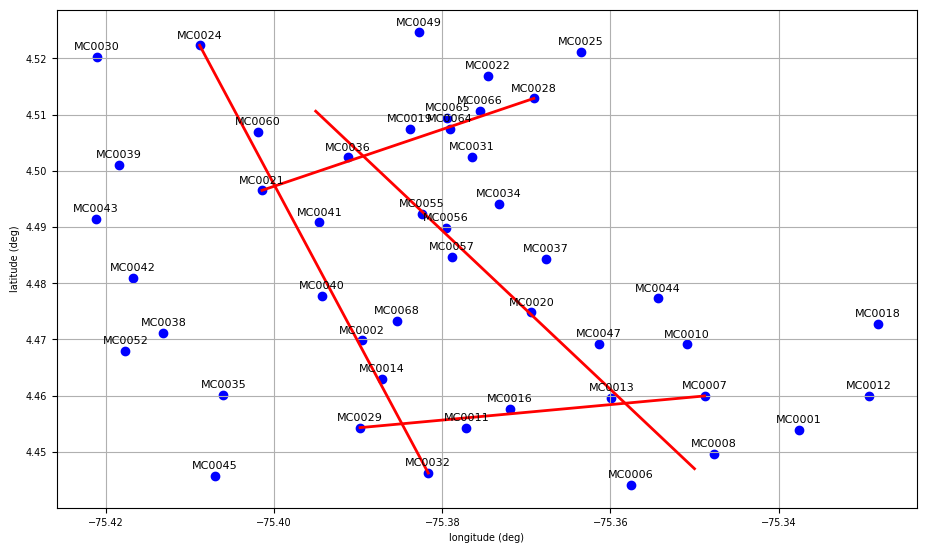

In [44]:
# Suponiendo que mc es tu MTCollection y generar el gráfico
# Se grafica la línea objetivo en el plot
data_plot = [np.array(mc.dataframe["station"]), np.array(mc.dataframe["latitude"]), np.array(mc.dataframe["longitude"])]

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data_plot[2], data_plot[1], color="b")

# ---> GENERAR EL PERFIL SOBRE EL GRÁFICO DE ESTACIONES <---

ax.plot([-75.408861, -75.381667], [4.522333, 4.446222], color='red', linestyle='-', linewidth=2)
ax.plot([-75.395056, -75.35], [4.510611, 4.447], color='red', linestyle='-', linewidth=2)
ax.plot([-75.401444, -75.369111], [4.496528, 4.512889], color='red', linestyle='-', linewidth=2)
ax.plot([-75.389778, -75.348806], [4.454306, 4.459944], color='red', linestyle='-', linewidth=2)
# ---> GRAFICAR <---
ax.set_xlabel('longitude (deg)')
ax.set_ylabel('latitude (deg)')

for i, name in enumerate(data_plot[0]):
    ax.annotate(name, (data_plot[2][i], data_plot[1][i]), 
                textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='black')

plt.grid(True) 
plt.show()

In [49]:
# Se genera los datos del perfil con los datos interpolados

# 1er perfil
#profile_mt_data = interp_mt_data.get_profile(-75.408861, 4.522333, -75.381667, 4.446222, 400)
# 2do perfil
#profile_mt_data = interp_mt_data.get_profile(-75.395056, 4.510611, -75.35, 4.447, 400)
# 3er perfil
#profile_mt_data = interp_mt_data.get_profile(-75.401444, 4.496528, -75.369111, 4.512889, 400)
# 4to perfil
profile_mt_data = interp_mt_data.get_profile(-75.389778, 4.454306, -75.348806, 4.459944, 200)

# La estructura es: 
# get_profile(longitud punto1, latitud punto1, long punto2, latitud punto2, tolerancia)
# La tolerancia se refiere a la distancia desde el perfil que se va a tener en cuenta para tomar las estaciones que están a menos de esa distancia.

In [50]:
print(len(profile_mt_data))
profile_mt_data

5


MTData([('MC.MC0029',
         TF( survey='MC', station='MC0029', latitude=4.45, longitude=-75.39, elevation=1695.00 )),
        ('MC.MC0011',
         TF( survey='MC', station='MC0011', latitude=4.45, longitude=-75.38, elevation=1812.00 )),
        ('MC.MC0016',
         TF( survey='MC', station='MC0016', latitude=4.46, longitude=-75.37, elevation=2012.00 )),
        ('MC.MC0013',
         TF( survey='MC', station='MC0013', latitude=4.46, longitude=-75.36, elevation=2185.00 )),
        ('MC.MC0007',
         TF( survey='MC', station='MC0007', latitude=4.46, longitude=-75.35, elevation=2070.00 ))])

In [51]:
# En una variable se guarda los datos del perfil como tipo dataframe
mt_df = profile_mt_data.to_dataframe()
# Ordenar los datos
mt_df = mt_df.sort_values(["profile_offset", "period"])

In [30]:
# En una variable se guarda los datos del perfil como tipo dataframe
mt_df = interp_mt_data.to_dataframe()
# Ordenar los datos
mt_df = mt_df.sort_values(["profile_offset", "period"])

In [32]:
mt_df

,survey,station,latitude,longitude,elevation,datum_epsg,east,north,utm_epsg,model_east,...,ptyx_model_error,ptyy,ptyy_error,ptyy_model_error,rms_zxx,rms_zxy,rms_zyx,rms_zyy,rms_tzx,rms_tzy
0,MC,MC0036,4.502417,-75.391194,2318.0,4326,456602.955274,497674.225585,32618,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MC,MC0036,4.502417,-75.391194,2318.0,4326,456602.955274,497674.225585,32618,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MC,MC0036,4.502417,-75.391194,2318.0,4326,456602.955274,497674.225585,32618,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MC,MC0036,4.502417,-75.391194,2318.0,4326,456602.955274,497674.225585,32618,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MC,MC0036,4.502417,-75.391194,2318.0,4326,456602.955274,497674.225585,32618,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,MC,MC0008,4.449639,-75.347694,1787.0,4326,461425.915059,491837.789049,32618,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,MC,MC0008,4.449639,-75.347694,1787.0,4326,461425.915059,491837.789049,32618,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,MC,MC0008,4.449639,-75.347694,1787.0,4326,461425.915059,491837.789049,32618,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,MC,MC0008,4.449639,-75.347694,1787.0,4326,461425.915059,491837.789049,32618,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
type(mt_df)

pandas.core.frame.DataFrame

In [65]:
# Observar los datos
mt_df[["survey", "station", "profile_offset", "period"]]

,survey,station,profile_offset,period
0,MC,MC0001,0.0,0.0032
10,MC,MC0002,0.0,0.0032
20,MC,MC0006,0.0,0.0032
30,MC,MC0007,0.0,0.0032
40,MC,MC0008,0.0,0.0032
...,...,...,...,...
459,MC,MC0060,0.0,9.2000
469,MC,MC0064,0.0,9.2000
479,MC,MC0065,0.0,9.2000
489,MC,MC0066,0.0,9.2000


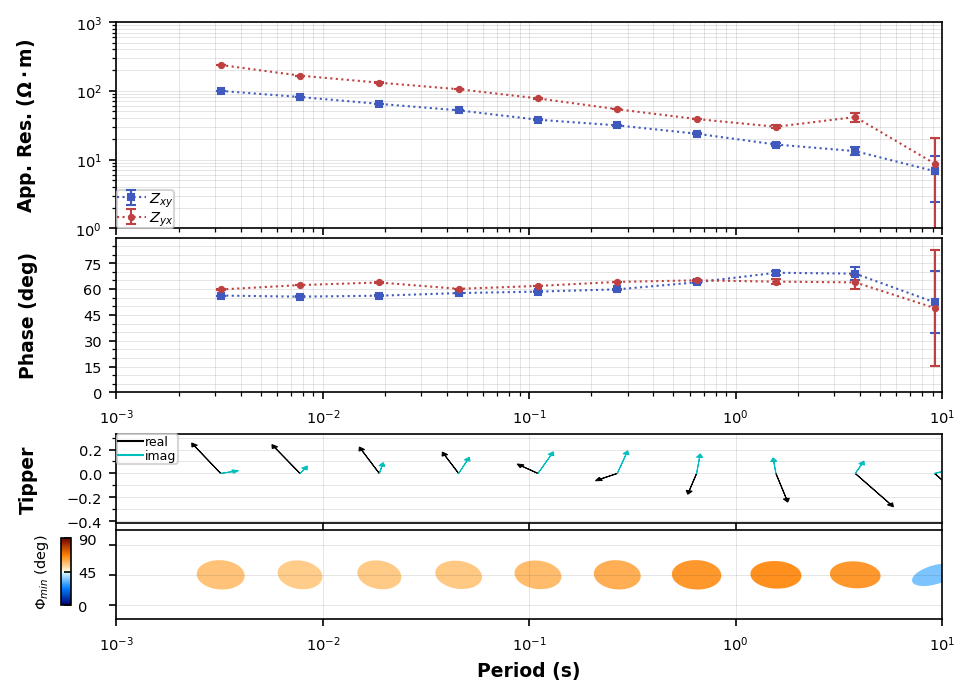

In [67]:
try: 
    profile_mt_data.plot_mt_response("MC.MC0041")
except:
    pass


In [51]:
len(profile_mt_data.get_station(station_key="MC.MC0057").Z.frequency)
#24, 60, 21, 41, 40, 02, 14, 32


KeyError: 'Could not find MC.MC0057 in MTData.'

### Guardar archivo h5

In [52]:
# INSTALAR PYTABLES ---> conda install pytables

# Guardar los datos del perfil en un h5
# Este archivo está listo para la inversión 2D
# mode='w' -> Modo writing, que permite editar y sobreescribe si hay un h5 con el mismo nombre.
mt_df.to_hdf(Path(path_h5+"cerromachin_perfil04.h5"), key="mt_data", mode="w")

C:\Users\Ivan Camilo\AppData\Local\Temp\ipykernel_10660\3888804831.py:6: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block2_values] [items->Index(['survey', 'station', 'datum_epsg', 'utm_epsg'], dtype='object')]

  mt_df.to_hdf(Path(path_h5+"cerromachin_perfil04.h5"), key="mt_data", mode="w")


In [53]:
# ---> SIEMPRE CERRAR EL MTCOLLECTION()
mc.close_collection()

24:11:26T23:17:06 | INFO | line:761 |mth5.mth5 | close_mth5 | Flushing and closing ..\data\transfers_functions\level_0\cerromachin_collection2.h5


In [55]:
import h5py

# Crear un archivo HDF5
with h5py.File('output_mt_data.h5', 'w') as h5file:
    # Guardar los datos del MTData
    # (Debes estructurar los datos de manera adecuada, por ejemplo, guardando los arrays de datos relevantes)
    for station_key in mt_data.keys():
        station_data = mt_data[station_key]
        # Crear un grupo para cada estación y guardar los datos
        h5file.create_group(station_key)
        # Aquí debes definir cómo extraer los datos de station_data y almacenarlos en el archivo HDF5


In [17]:
mc.close_collection()

24:11:29T10:49:53 | INFO | line:761 |mth5.mth5 | close_mth5 | Flushing and closing ..\data\transfers_functions\level_0\cerromachin_collection.h5
